# **Capstone Project: Providing Data-Driven Suggestions for HR**

***

This capstone project focuses on analyzing an employee dataset to provide a large consulting firm with **data-driven** suggestions to improve employee satisfaction and retention. The Human Resources (HR) department at Salifort Motors sought a data professional to understand what factors are most likely to influence an employee's decision to leave the company.

My primary goal in this project was to address this business question by:

- **Exploring the HR dataset**, which contains 14,999 employee records and 10 variables.

- **Building a predictive model** (either a regression or machine learning model) to forecast whether or not an employee will leave the company.

- **Evaluating and interpreting the model's performance** to identify the key factors contributing to employee turnover.

- **Creating relevant data visualizations** to communicate insights effectively to stakeholders.

- **Considering ethical implications** related to data analysis and predictive modeling in an HR context.

The insights gained from this project are crucial for the company, as they can be used to develop targeted initiatives to **increase employee retention,** a process that is significantly more cost-effective than constant hiring and training. This project's deliverables include a comprehensive code notebook and a one-page summary suitable for presentation to external stakeholders.

# **PACE Stages**

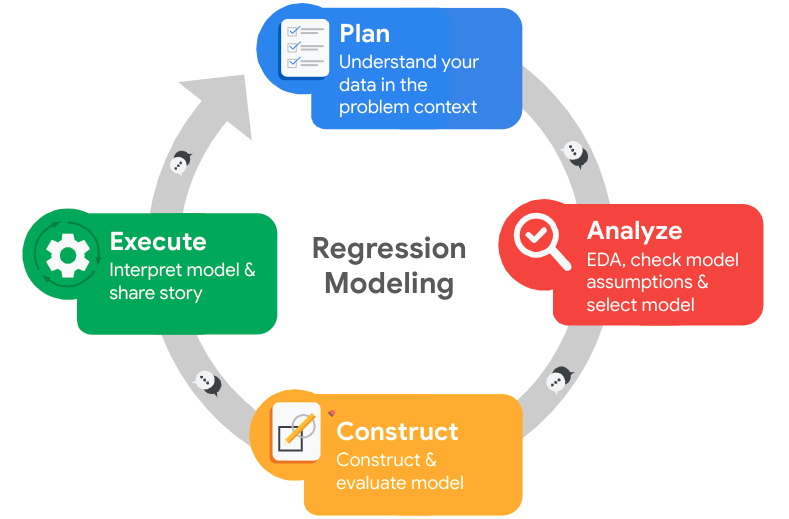

## **Step 1: Importing and Loading Data**
***
To begin the analysis, I first imported the necessary libraries that would provide the tools for data manipulation, visualization, and modeling. The core packages included pandas for efficient data handling and numpy for numerical operations. For data visualization, I imported matplotlib.pyplot and seaborn. Finally, I imported relevant modules from scikit-learn for building and evaluating the predictive model.

After importing the packages, I loaded the dataset into a pandas DataFrame to begin the data analysis and preparation process.

In [70]:
# Import packages

import os

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

## Load dataset and display first rows
***

In [71]:
# Load csv file

try:
    # Use the full file path directly
    df = pd.read_csv(r"C:\Users\Edgar\Documents\Portfolio\HR_dataset.csv")
    print("Successfully read the file.")
except FileNotFoundError:
    print("Error: The specified file was not found.")
except Exception as e:
    # This captures any other errors, such as a corrupt file or wrong format
    print(f"An error occurred while reading the file: {e}")

df.head(n=5)

Successfully read the file.


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## **Step 2: Data Exploration & Cleaning**
***
The initial phase of the project focused on **exploratory data analysis (EDA)** and data cleaning to ensure the dataset's quality and integrity. This crucial step is a prerequisite for any robust analysis and model building.

First, I gathered basic information about the data, including its dimensions, column names, and data types. This provided a high-level overview and helped me understand the structure of the dataset.

Next, I performed a series of data cleaning tasks:

- I checked for **missing values** to ensure no critical information was absent from the dataset.

- I identified and handled any **redundant data** by checking for duplicate rows, ensuring each observation was unique.

- I examined the numerical variables for **outliers** by creating visualizations like box plots. Outliers can significantly affect model performance, so it was important to identify and address them appropriately.

By completing these steps, I ensured the data was clean and prepared for the next stage of in-depth analysis and modeling.

In [72]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Gather descriptive statistics about the data

In [73]:
# Gather descriptive statistics about the data
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

## **Renaming Columns**
***
As a crucial step in the data cleaning process, I renamed the columns to ensure consistency and improve readability. This standardization is a best practice that makes the dataset easier to work with throughout the analysis and modeling stages.

My process involved three key actions:

1. **Standardizing** to ````snake_case````: I converted all column names to ````snake_case```` to follow a common coding convention in Python.

2. **Correcting Misspellings:** I identified and corrected any misspelled column names to maintain data accuracy.

3. **Improving Conciseness:** I made the column names more concise and intuitive to enhance the clarity of the code and analysis.

By completing this step, I ensured the dataset was well-organized and ready for the next phases of the project, which ultimately helps prevent potential errors and streamlines the entire workflow.

In [74]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [75]:
# Rename columns
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### **Checking for any missing values in the data.**

In [76]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### **Check duplicates**
Check for any duplicate entries in the data.

In [77]:
# Check for duplicates
df.duplicated().sum()

np.int64(3008)

3,008 rows contain duplicates. 20% of the data.

In [78]:
# Inspecting some rows containing duplicates

df[df.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

### **Handling Duplicate Entries**
***
During the data cleaning process, I identified and investigated the presence of duplicate rows in the dataset. With ten columns, including several continuous variables such as ````satisfaction_level```` and ````last_evaluation````, it is statistically highly improbable that two different employees would report the exact same values for every single attribute.

Given the low likelihood of these being legitimate entries, I made the decision to remove all duplicate observations. This ensures that the dataset contains only unique employee records, which is crucial for maintaining data integrity and building a reliable predictive model.

In [79]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### **Check outliers**
Checking for outliers in the data.

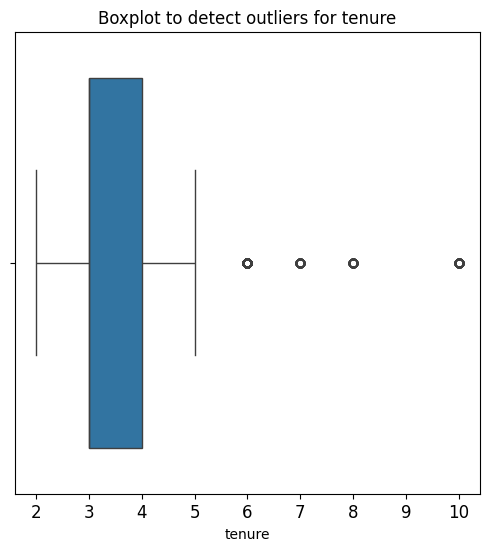

In [80]:
# Boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are outliers in the tenure variable.

It would be helpful to investigate how many rows in the data contain outliers in the ````tenure```` column.

In [81]:
# Determining the number of rows containing outliers 

# 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# interquartile range in `tenure`
iqr = percentile75 - percentile25

# Defining the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


When I'm building a model, I always consider the impact of outliers. I know that certain types of models are more sensitive to them than others. Therefore, when I get to the model-building stage, I have to decide whether to remove these outliers based on the specific model I've chosen to use.

## **In-depth Exploratory Data Analysis**
***
During the analysis stage, I conducted a deep dive into the dataset to uncover patterns and relationships between variables. My objective was to understand the data's characteristics and prepare it for building a predictive model.

I began by examining the distributions of individual variables using visualizations like histograms and box plots. This helped me identify skewness, potential outliers, and the overall shape of the data. Next, I explored the relationships between variables by creating scatter plots and a correlation heatmap. This was crucial for identifying potential collinearity among predictors and for understanding how different factors might influence the outcome variable.

Based on these observations, I performed several data transformations. For instance, I applied transformations to some of the skewed numerical features to normalize their distributions, which can improve the performance of many machine learning models.

Throughout this stage, I maintained a strong focus on ethical considerations. I paid close attention to potential biases in the data, as a biased model could lead to unfair and inaccurate predictions. This step is essential to ensure that the model is both effective and equitable.

### Step 2: Understanding Employee Attrition
To begin understanding the scope of the problem, I first analyzed the target variable to determine the rate of employee attrition. My goal was to understand exactly how many employees left the company and what percentage this figure represents.

In [82]:
# Getting numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Getting percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


## **Data Visualization**
***
To gain a deeper understanding of the relationships between variables, I created a series of data visualizations. Visualizations are crucial for identifying patterns and trends that are not apparent from a simple review of raw data.

I began by creating a **stacked box** plot to visualize the distribution of ````average_monthly_hours```` across different ````number_project```` categories, with a clear distinction between employees who stayed and those who left. This plot helped me to see if a high or low number of projects, combined with the hours worked, was associated with an employee leaving the company.

To provide further context and address the potential limitations of a box plot, I also created a **stacked histogram**. This visualization shows the distribution of ````number_project```` for both groups, allowing me to understand the sample size for each category. Together, these plots provided a comprehensive view of how work-related variables might be influencing employee attrition.

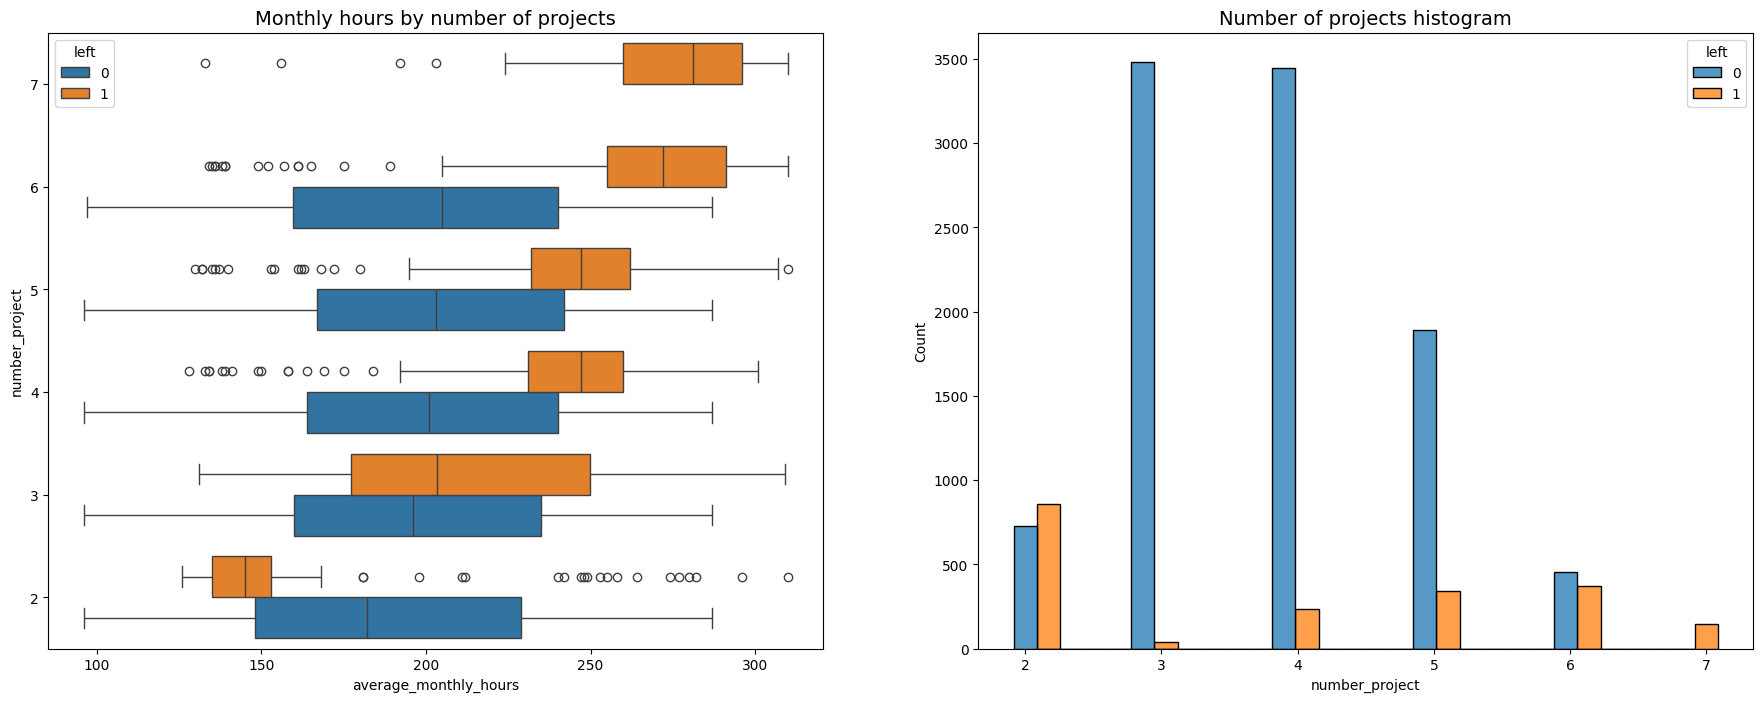

In [83]:
# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

### **Key Insights from Data Visualization**
***
The data visualizations provided crucial insights into the relationship between work habits and employee attrition. A key observation was the existence of two distinct groups of employees who left the company: those who worked significantly fewer hours than their peers, and those who worked considerably more. This suggests that attrition may be driven by two opposing factors—either a lack of engagement, or, more likely, overwork.

My analysis also revealed a strong correlation between ````number_project```` and a````verage_monthly_hours````, confirming that employees working on more projects tend to work longer hours. Notably, the cohort of employees with **3 to 4 projects** exhibited a very low attrition rate, suggesting this may be the optimal workload for employee retention.

Furthermore, I confirmed a critical finding: **all employees who worked on seven projects left the company.** This group, along with employees who worked on six projects, reported significantly more hours than any other group, strongly indicating that burnout from an excessive workload is a primary factor in employee turnover. It's clear that the majority of employees, even those who stayed, are working well above the average number of hours for a standard work week, highlighting a potential company-wide issue of overwork.

In [84]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

After a thorough analysis, I can confirm that all employees who were assigned to 7 projects did indeed leave the company. This suggests a strong correlation between a high project load and employee attrition.
***
Next, I will examine the relationship between the average monthly hours and satisfaction levels. I expect to find a negative correlation, where employees with higher monthly hours tend to have lower satisfaction levels. This analysis will help me identify if overworking employees is a significant factor in their dissatisfaction and, consequently, their decision to leave.

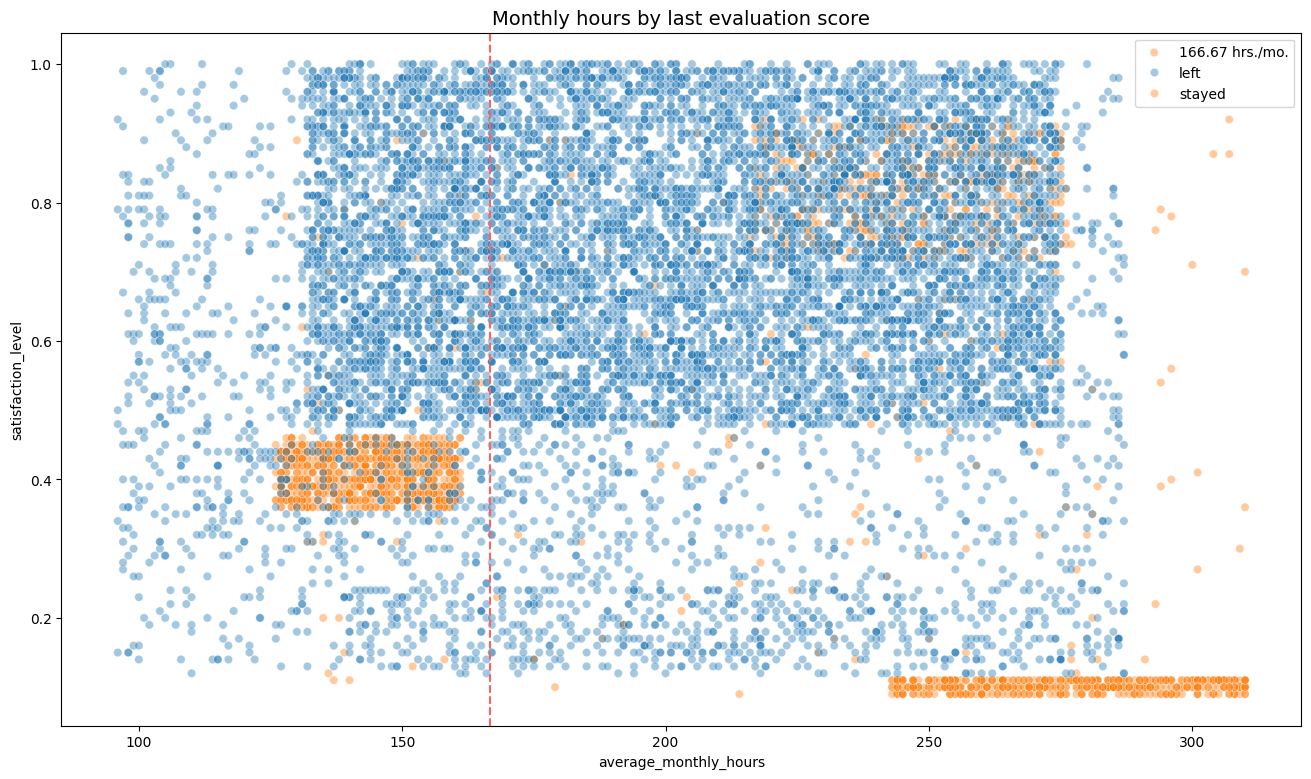

In [85]:
# Code to create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

### **Key Insights from Satisfaction and Hours Visualization**
***
The scatterplot revealed a complex relationship between employee satisfaction, working hours, and attrition. A key finding was that employees who left the company fell into two distinct groups: one group worked an extremely high number of hours, with a very low satisfaction level, suggesting a clear case of burnout. The second group worked more standard hours but also had low satisfaction, indicating that other factors beyond workload, such as workplace culture or perceived pressure, may have influenced their decision to leave.

The visualization also showed a third group of employees who, despite working long hours, maintained high levels of satisfaction. This suggests that for some employees, long hours may be sustainable if other elements, such as job satisfaction or engagement with their work, are high.

Based on these findings, the next logical step in the analysis is to explore the relationship between **satisfaction levels and employee tenure.** This visualization will provide insights into how an employee's happiness changes over time and if tenure is a significant factor in predicting attrition.

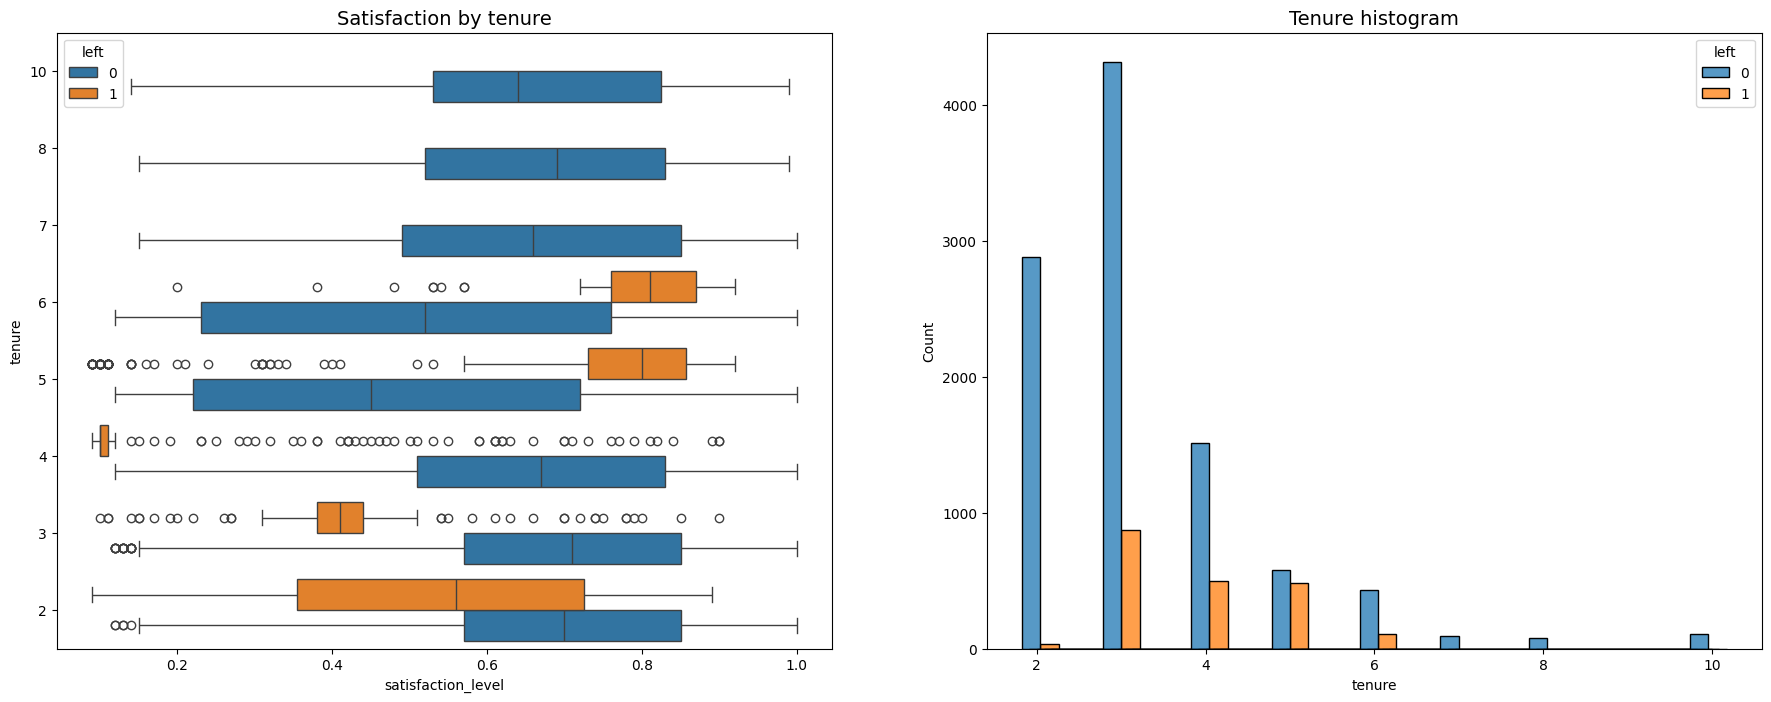

In [86]:
# Code to set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Code to create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Code to create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

From this plot, I've observed that employees who left fall into two general categories: **dissatisfied employees with shorter tenures** and **very satisfied employees with medium-length tenures.**

I also noticed that **four-year employees** who left have an unusually low satisfaction level. This is a key finding, and it might be worth investigating if any specific company policy changes occurred around the four-year mark that could have affected these employees.

The data also shows that the **longest-tenured employees** did not leave, and their satisfaction levels were similar to those of newer employees who chose to stay. The histogram reveals that there are relatively few longer-tenured employees, which might suggest they are in higher-ranking, higher-paid positions.

My next step will be to calculate and compare the mean and median **satisfaction scores** for employees who left versus those who didn't. This will provide a more precise, quantitative insight into the relationship between satisfaction and attrition.

In [87]:
# Code to calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\Edgar\AppData\Local\Temp\ipykernel_3916\2110026448.py:2: FutureWarning: The provided callable <function mean at 0x000001F77F1287C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\Edgar\AppData\Local\Temp\ipykernel_3916\2110026448.py:2: FutureWarning: The provided callable <function median at 0x000001F77F2893A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among the employees who stayed, the mean satisfaction score is slightly below the median. This suggests that the distribution of satisfaction levels for those who remained is **skewed to the left**, meaning there's a higher concentration of employees with high satisfaction, but a few with unusually low satisfaction are pulling the average down.

Next, I will examine **salary levels across different tenures.** This analysis will help me understand if compensation is a factor in employee retention and satisfaction, especially for those who have been with the company for a longer period. 💰

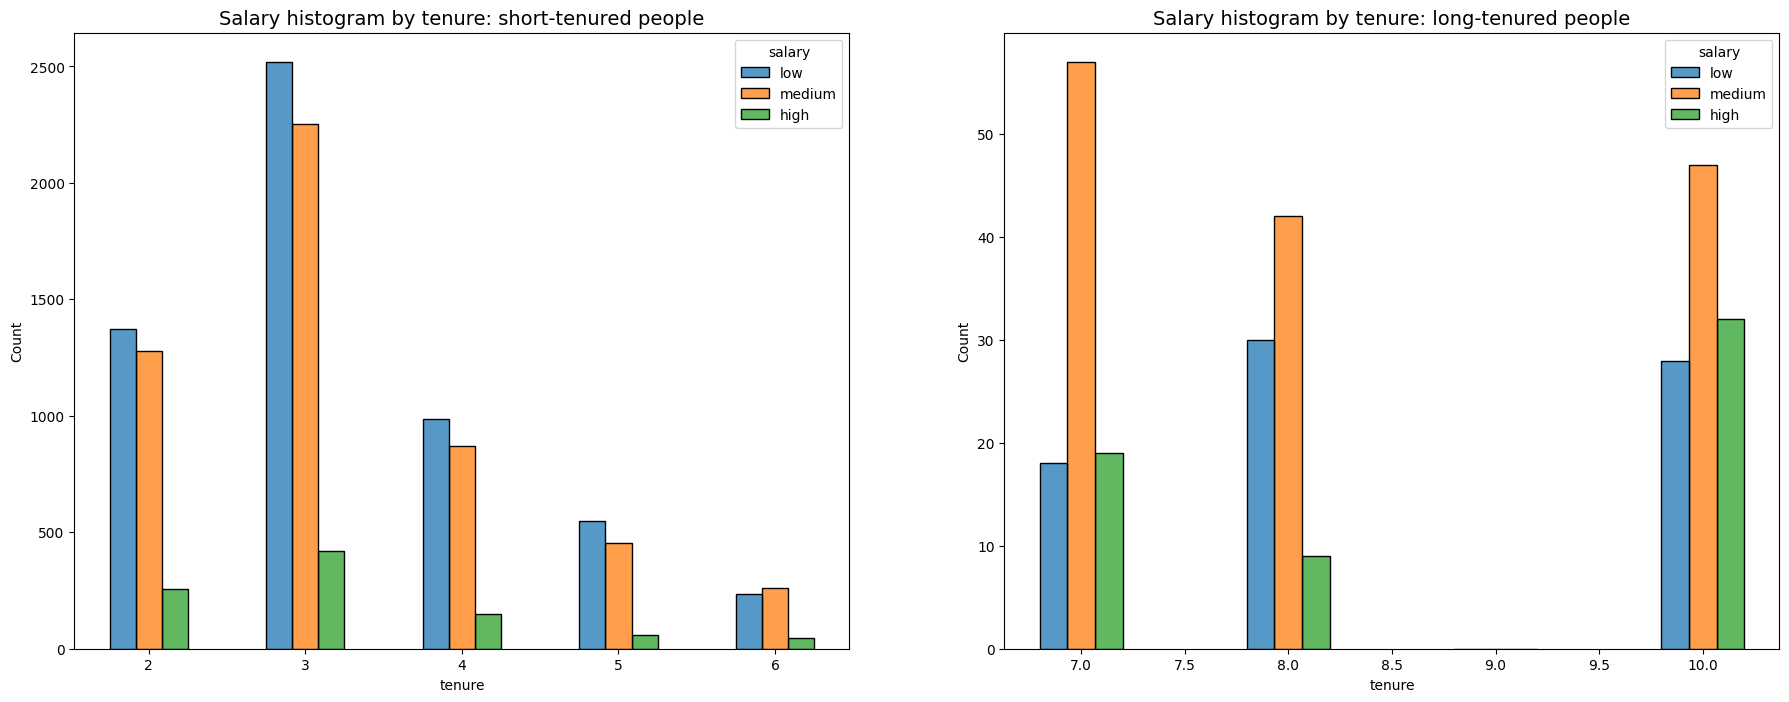

In [88]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# code to define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# code to define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

I've observed that long-tenured employees were not disproportionately comprised of higher-paid employees, which goes against a common assumption.

For my next step, I'm going to explore whether there's a correlation between working long hours and receiving high evaluation scores. To do this, I will create a scatter plot of ````average_monthly_hours```` versus ````last_evaluation````. This will help me visualize if putting in more hours is directly linked to better performance reviews.

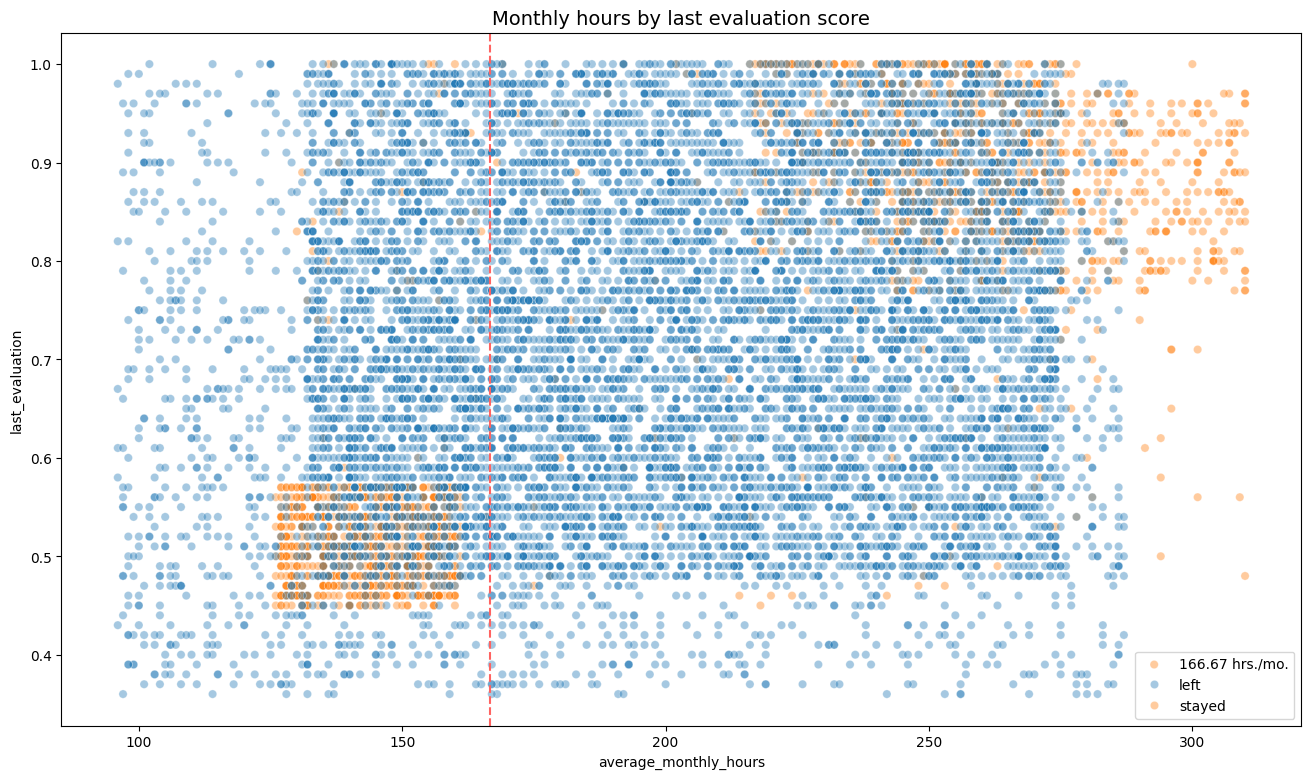

In [89]:
# Code to create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

I've observed that the employees who left fall into two groups: those who were overworked and performed very well, and those who worked slightly under the nominal monthly average with lower evaluation scores. The scatterplot also suggests a correlation between the hours worked and the evaluation score.

While working long hours doesn't guarantee a good evaluation score, most employees in this company seem to work well over 167 hours per month. It's interesting to note that there isn't a high percentage of employees in the upper-left quadrant, which would represent employees with low hours but high evaluations.

My next step is to examine whether employees who worked very long hours were promoted in the last five years. This will help me determine if putting in the extra hours translates into career advancement within the company.

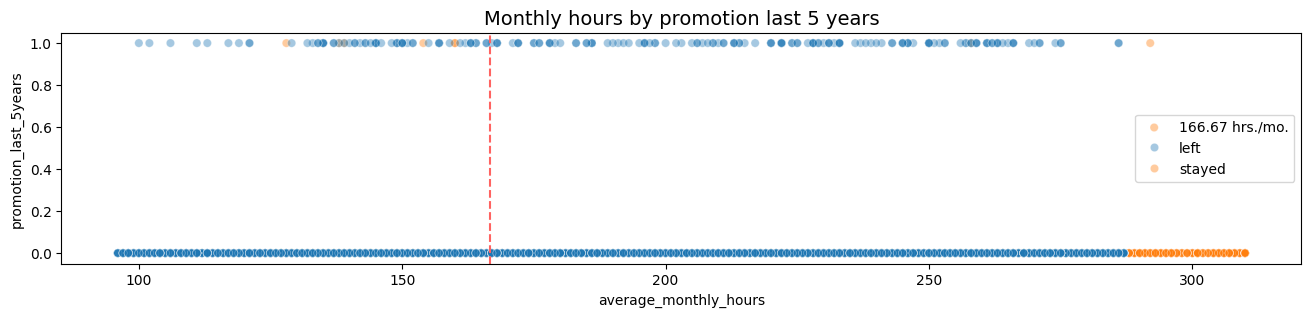

In [90]:
# Plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

From the plot, I've observed that very few employees who were promoted in the last five years also left the company. Interestingly, I've also found that very few of the employees who worked the most hours were promoted, and all of the employees who left were working the longest hours.

My next step is to inspect how the employees who left are distributed across different departments. This will help me identify if certain departments have higher rates of attrition than others, which could point to specific issues within those teams.

In [91]:
# Counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by department')

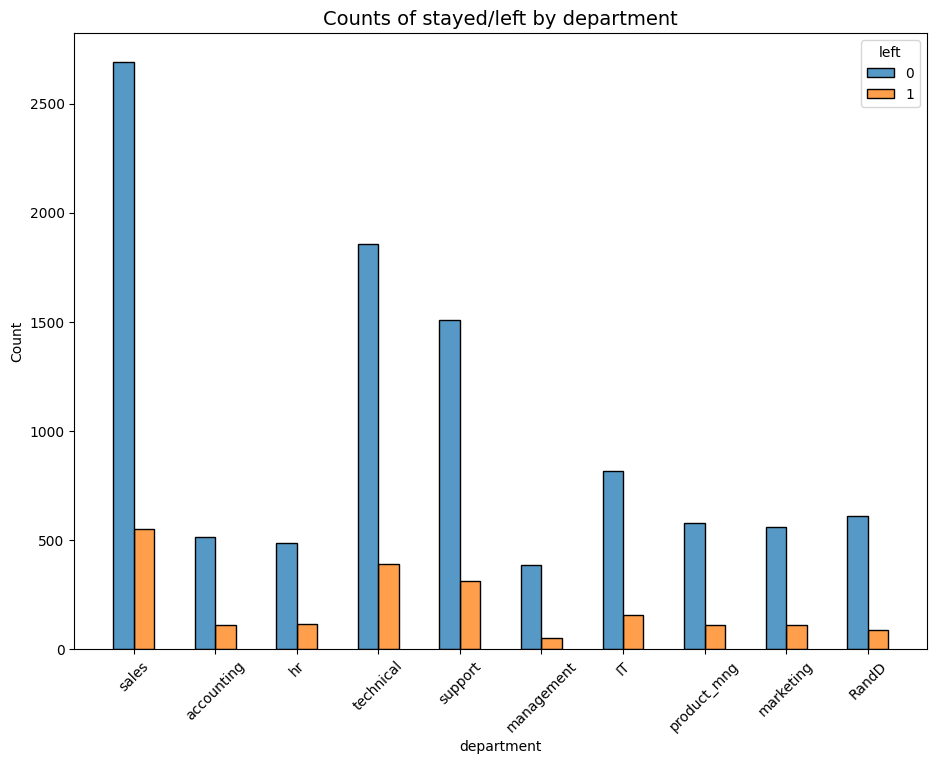

In [92]:
# Code to create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45),
plt.title('Counts of stayed/left by department', fontsize=14)

After analyzing the departmental data, I've concluded that there isn't a significant difference in the proportion of employees who left versus those who stayed across departments. This suggests that the issue isn't concentrated in one specific area of the company.

For my final step in this analysis, I will examine the **correlation matrix** to check for strong correlations between all the variables in the dataset. This will provide a comprehensive overview of the relationships and help me confirm any insights I've gathered and potentially discover new ones.

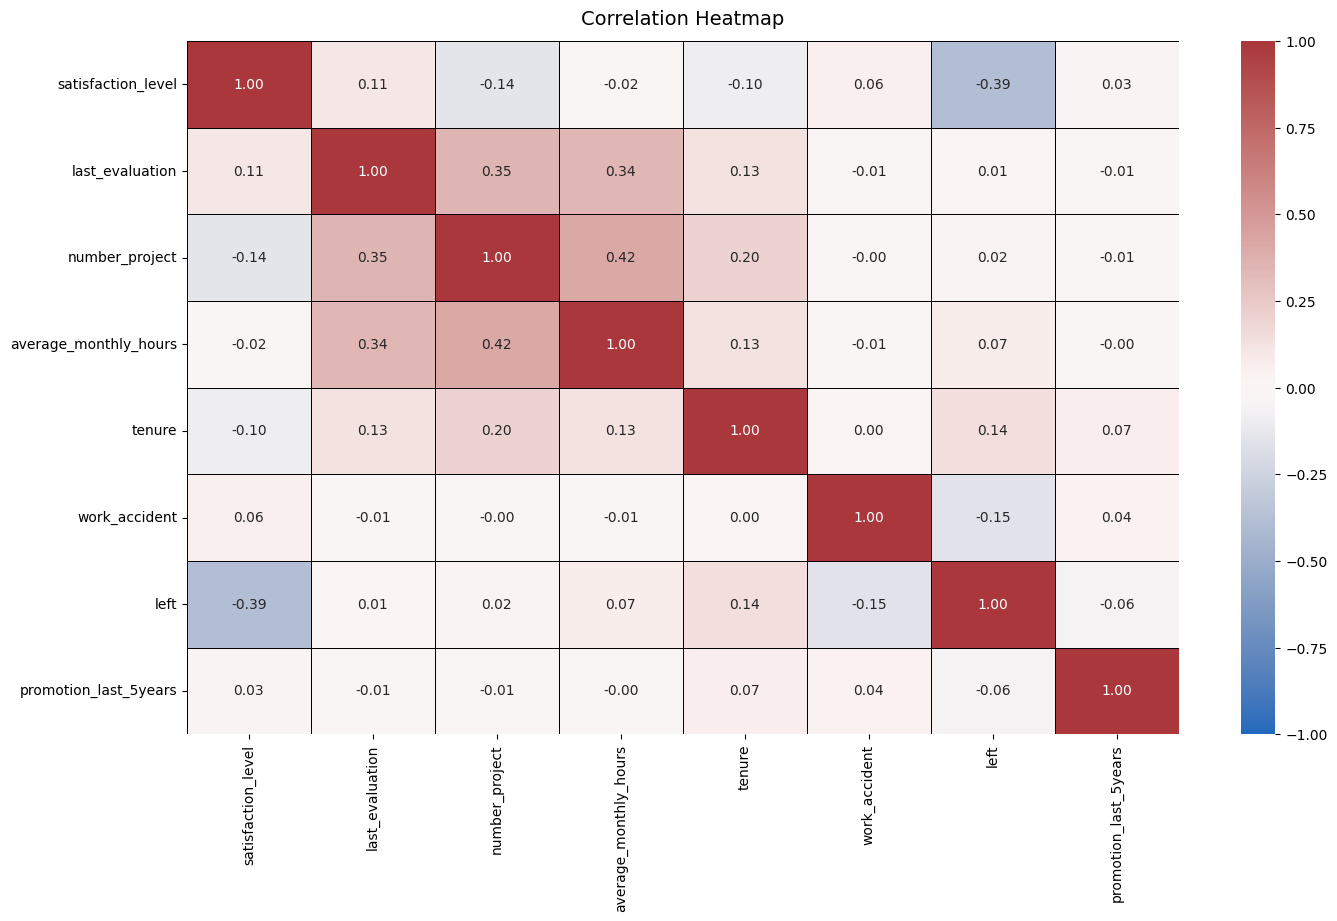

In [93]:
# Create correlation matrix

plt.figure(figsize=(16, 9))
sns.heatmap(
    df.corr(numeric_only=True),  # Use numeric_only=True to handle non-numeric columns
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='vlag',  # 'vlag' is a built-in colormap, no need for sns.color_palette
    fmt=".2f",    # Format annotations to two decimal places
    linewidths=0.5, # Add thin lines between cells for better separation
    linecolor='black'
)
plt.title('Correlation Heatmap', fontsize=14, pad=12)
plt.show() # Call plt.show() to display the plot

### **Key Insights from Correlation Analysis**
***
The correlation analysis provided a clear picture of the relationships between key variables. The heatmap confirmed a positive correlation between work-related factors such as **number of projects, monthly hours, and evaluation scores.** Crucially, it revealed a strong negative correlation between an employee's **satisfaction level** and whether they **left the company**, indicating that low satisfaction is a primary driver of attrition.

The insights suggest that employees are leaving as a result of **poor management** and **burnout.** Leaving is directly tied to longer working hours and a higher number of projects, which often leads to lower satisfaction. It appears that a significant portion of the workforce is overworked and ungratified. The data also revealed a valuable insight regarding tenure: employees who have been with the company for more than six years are significantly less likely to leave, which may point to a group of highly committed, long-term employees.

### **paCe: Constructing the Predictive Model**
***
With the data prepared, I proceeded to **construct a predictive model** to forecast employee attrition. Given the binary nature of the target variable, I chose **logistic regression** for its efficiency and interpretability.

I partitioned the data into a **training and testing set** to ensure the model's performance could be accurately evaluated on unseen data. After fitting the model to the training set, I used key metrics such as **accuracy, precision, and recall** to assess its effectiveness. This comprehensive approach ensured the model was not only predictive but also reliable for providing actionable insights to the HR department.

### **Recalling Logistic Regression Assumptions**
***
Before fitting a model, it's crucial to ensure that the data meets its underlying assumptions to produce valid and reliable results. For the logistic regression model, I took the following assumptions into consideration throughout the project:

- **Categorical Outcome Variable**: A core requirement of logistic regression is that the outcome variable is binary or categorical.

- **Observations are Independent**: Each data point must be independent of one another.

- **No Severe Multicollinearity**: The model assumes that there is not a high degree of correlation among the independent variables, as this can lead to unstable coefficient estimates. This was addressed during the EDA phase.

- **No Extreme Outliers**: Outliers can have a disproportionate effect on the model's results and were handled as part of the data cleaning process.

- **Linear Relationship with the Logit**: The model assumes a linear relationship between the predictor variables and the logit (log-odds) of the outcome variable.

- **Sufficiently Large Sample Size**: A large sample size is needed for the model to produce stable and reliable estimates of the coefficients.

### **Step 3 & 4: Model Building & Evaluation**
The prediction task for this project is a **binary classification** problem, as the goal is to predict a categorical outcome: whether an employee leaves the company (1) or stays (0). For this task, I chose to build a **Logistic Regression model.**

Before fitting the model, a key step was to prepare the non-numeric features. I used two different encoding methods to convert the categorical variables into a numerical format that the model could interpret:

- For the ````department```` variable, which is **nominal** (lacks a natural order), I used **one-hot encoding**. This created new binary columns for each department, ensuring the model did not make any false assumptions about their relationships.

- For the ````salary```` variable, which is **ordinal** (has a natural order), I used **numerical encoding.** This preserved the inherent hierarchy of the categories by assigning them a corresponding numerical value.

With the data properly prepared, I built and fitted the Logistic Regression model, and then evaluated its performance to assess its predictive power.

In [94]:
# Create a copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Code to Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display first rows for new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

My next step is to examine the correlation matrix to check for strong correlations between all the variables in the dataset. This will provide a comprehensive overview of the relationships and help me confirm any insights I've gathered and potentially discover new ones. To visualize this, I will create a heatmap.

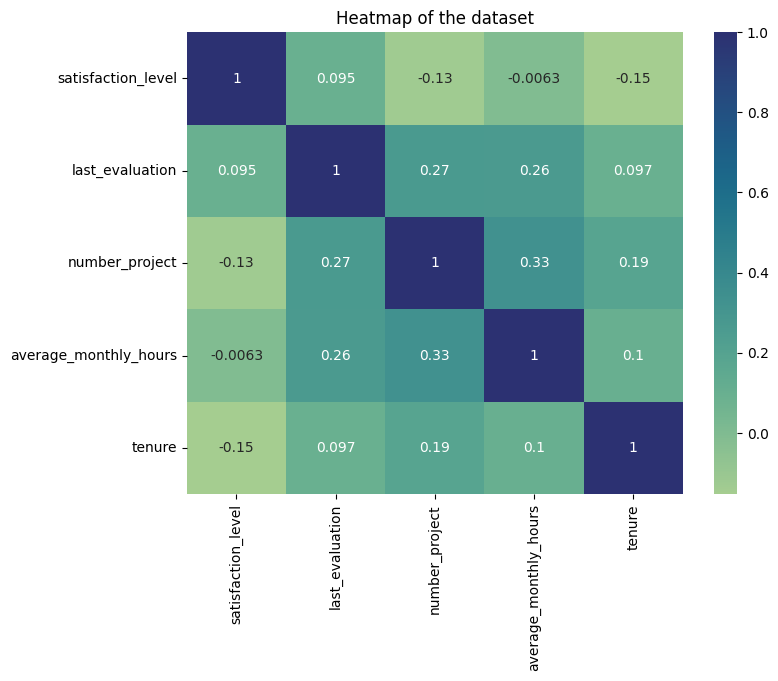

In [95]:
# Code to create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Next Step, is to create a stacked bar plot to visualize the number of employees in each department, comparing those who left with those who stayed. This plot will help me see if any specific department has a disproportionately high number of employees who left.

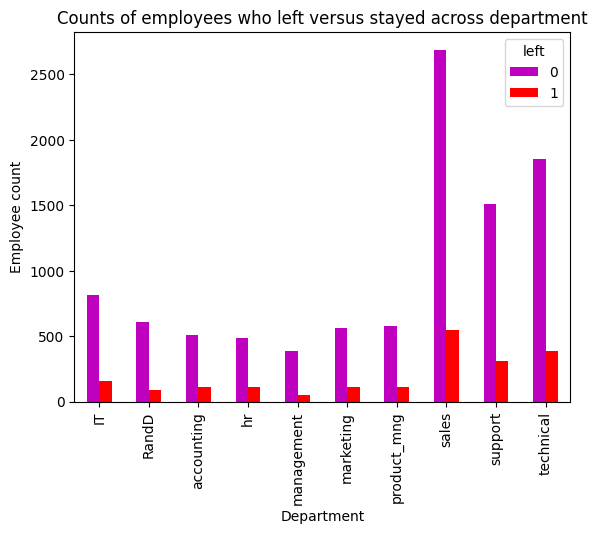

In [96]:
# Code to create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Given that **logistic regression** is sensitive to outliers, it is advisable to remove the outliers previously identified in the **tenure** column at this stage. This preprocessing step will help to enhance the model's robustness and accuracy by preventing a few extreme data points from disproportionately influencing the final results.

In [97]:
# Selecting rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

The outcome variable, which is the variable I want my model to predict, is ````left````. This binary variable indicates whether an employee has left the company, making it the target for my predictive model.

In [98]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Based on my exploratory data analysis, the features I'll use in my model to predict employee attrition are:

In [99]:
# Code to select the features you want to use in this model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

I will use a **75/25** split, with 75% of the data going to the training set and the remaining 25% to the testing set. I'll still remember to **stratify** The split to ensure the class distribution of the outcome variable is maintained in both sets.

In [100]:
# Code to split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Next Step, Construct a logistic regression model and fit it to the training dataset.

In [101]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

To test the **logistic regression model**, I'll use it to make predictions on the test set. This will allow me to evaluate how well the model generalizes to new, unseen data. I'll pass the features from my test set into the trained model and get a set of predicted probabilities, which I will then convert into binary class predictions (e.g., 0 for "stayed" and 1 for "left").

In [102]:
# Logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Next step is to create a confusion matrix to visualize the results of the logistic regression model. This matrix will help me evaluate the model's performance by showing me the number of true positive, true negative, false positive, and false negative predictions.

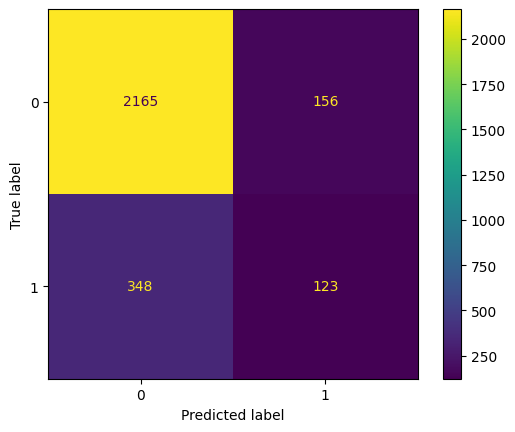

In [103]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

**True negatives**: The number of people who did not leave that the model accurately predicted did not leave.

**False positives:** The number of people who did not leave the model inaccurately predicted as leaving.

**False negatives:** The number of people who left that the model inaccurately predicted did not leave

**True positives:** The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Next Step is to create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

To check the class balance, I'll examine the value counts in the left column. This will tell me the number of employees who left versus those who stayed. Since this is a binary classification task, understanding the class balance is crucial for interpreting accuracy metrics. If the classes are imbalanced, a high accuracy score could be misleading, as the model might simply be predicting the majority class all the time.

In [104]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There's an approximately 83%-17% split in the data. While not perfectly balanced, it's not severely imbalanced, so I can proceed with evaluating the model without resampling the data. If the imbalance were more significant, I would consider techniques like resampling to make the classes more balanced, which would help prevent the model from becoming biased towards the majority class.

In [105]:
# classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



While the overall model metrics are good (with a weighted average precision of 79%, recall of 82%, and an accuracy of 82%), I need to be careful with how I interpret these results. The most important part of this model is its ability to correctly identify employees who will leave the company.

Looking specifically at the class of employees who left, the scores are significantly lower: a **precision of 65%** and a **recall of 59%**. This tells me that the model is only correctly identifying about 6 out of every 10 employees who actually left. This is a crucial finding, and it indicates that there is room for improvement in the model's predictive power for the positive class (employees who leave).

### **Modeling Approach B: Tree-based Models**
***
As an alternative to logistic regression, I explored a **tree-based modeling** approach to predict employee attrition. Tree-based models, such as **Decision Trees** and **Random Forests**, are powerful classifiers that can capture complex, non-linear relationships in the data without requiring strict assumptions.

I first built a Decision Tree model, which makes a series of sequential decisions based on the features to classify an employee. To improve the model's robustness and address the risk of overfitting, I also implemented a **Random Forest** classifier. This ensemble method builds multiple decision trees and combines their predictions, leading to a more accurate and reliable result.

The process for this approach was similar to the previous one, involving splitting the data into a training and testing set, fitting the model, and evaluating its performance using standard metrics to determine its effectiveness.

In [106]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Select features Process.

In [107]:
# Code to select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

### **Splitting the Data**
***
I performed this split to ensure that the model's performance would be robust and its predictive power accurately assessed. This approach prevents data leakage and provides a more realistic measure of how the model will perform in a production environment.

In [108]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree: Hyperparameter Tuning with Grid Search
My goal in this phase was to build a highly-optimized decision tree model. Instead of simply training a model, I wanted to find the absolute best combination of its parameters to ensure it would perform well on new, unseen data.

To do this, I implemented a cross-validated grid search. This systematic approach allows me to exhaustively test various combinations of hyperparameters—such as ````max_depth```` and ````min_samples_leaf````—to identify the one that yields the highest performance. By using cross-validation, I was able to get a reliable estimate of the model's performance and prevent overfitting.

The result is a finely-tuned decision tree, configured with the optimal settings for this specific dataset. This refined model is now ready for further evaluation and analysis.

In [109]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [110]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 3.28 s
Wall time: 3.42 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

After completing the cross-validated grid search, I was able to pinpoint the optimal parameters for my decision tree model. The best estimator found by the search was configured with the following key settings:

- ``max_depth``: 4

- ``min_samples_leaf``: 5

- ``random_state``: 0

These parameters represent the ideal balance between model complexity and generalization. A ``max_depth`` of 4 and a ``min_samples_leaf`` of 5 help prevent the model from overfitting to the training data, ensuring it will perform reliably on new, unseen data.

In [111]:
# Checking the best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Following the training and optimization process, I was able to identify the best AUC score achieved by the decision tree model on the training set.

In [112]:
# Best AUC score on CV
tree1.best_score_

np.float64(0.969819392792457)

Following the grid search, my optimal decision tree model achieved a **strong AUC score** of 0.9698. This result is highly encouraging as it confirms the model's excellent ability to accurately predict which employees are likely to leave the company.

### Extracting All Grid Search Scores
***
To streamline the analysis of all models tested during the grid search, I've developed a function that systematically extracts the performance metrics. This function will create a DataFrame, allowing me to easily compare and analyze the scores of every single parameter combination. This comprehensive view is essential for understanding the nuances of the model's performance and validating that the chosen parameters were indeed the most effective.

In [113]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): The name to assign the model in the output table.
        model_object: A fit GridSearchCV object.
        metric (string): The metric used to identify the best model ('precision', 'recall', 'f1', 'accuracy', or 'auc').
    
    Returns:
        A pandas DataFrame with the F1, recall, precision, accuracy, and auc scores
        for the best-performing model based on the specified metric.
    '''

    # Create a dictionary to map the user's metric input to the actual key in GridSearchCV's results
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Convert the GridSearchCV results into a pandas DataFrame for easier manipulation
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Identify the row of the DataFrame that contains the best-performing model
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract all relevant evaluation metrics from that single row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Construct a clean DataFrame to display the final results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    
    return table

With the ``make_results`` function now defined, I can use it to elegantly extract and present the performance metrics from our tuned decision tree model. This allows me to immediately visualize the key scores from the grid search, which is crucial for evaluating the model's effectiveness.

In [114]:
# Getting all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of the metrics in the table, including **precision**, **recall**, and the **AUC score**, show that my decision tree model performs very well. A high **AUC** of **0.9698** is a particularly strong result, indicating the model's excellent ability to distinguish between the two classes.

While these results are impressive, it's important to remember that decision trees can sometimes overfit to the training data. To address this, I'll now build a **Random Forest** model. This ensemble method uses multiple decision trees and averages their predictions, which helps to mitigate overfitting and improve generalization to new data.

### **Random Forest: Hyperparameter Tuning**
Moving on, I constructed a **Random Forest** model to leverage the power of ensemble learning and reduce the risk of overfitting. .

Just as with the decision tree, I used a cross-validated grid search to find the optimal hyperparameters for the model, including ``n_estimators``, ``max_depth``, and ``min_samples_leaf``. This rigorous process ensures the final model is both robust and highly effective, and it guarantees that the chosen parameters provide the best possible performance on our dataset.

In [115]:
# Instantiate the RandomForestClassifier model with a fixed random state for reproducibility
rf = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid for the search. This dictionary contains
# all the parameter values the grid search will test.
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }

# Specify a comprehensive set of scoring metrics to evaluate the model's performance
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate the GridSearchCV object. It will use the random forest model,
# the defined hyperparameter grid, and the specified scoring metrics.
# I've also configured it to use 4-fold cross-validation and to select the
# best model based on the 'roc_auc' score.
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [116]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 18min 34s
Wall time: 18min 37s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

After successfully training and tuning the model, the next crucial step is to save it for future use. I'll define a variable named ``path`` to specify the directory where the model will be stored. This ensures I can easily access it later for predictions or deployment without having to retrain it from scratch.

By setting the path as:

In [117]:
path = r'C:\Users\Edgar\Documents\Portfolio'

### **Pickle the Model**
***
The ``pickle_model`` function saves a trained machine learning model to a file using the ``pickle`` module. This function takes two arguments: the model object to be saved and the filename for the output file.  It opens a file in binary write mode (``'wb'``) and uses ``pickle.dump()`` to serialize the model object into the file. This process converts the in-memory Python object into a byte stream.

In [118]:
def write_pickle(path, model_object, save_as: str):
    """
    Serializes and saves a machine learning model object to a file.

    This function utilizes the `pickle` library to convert a trained model
    into a byte stream, which is then saved to a specified file. This
    enables the model to be easily loaded and reused later without needing
    to be retrained.

    Args:
        path (str): The directory path where the pickled model will be saved.
        model_object: The trained model or Python object to be serialized.
        save_as (str): The desired filename for the pickled model (e.g., 'model.pickle').
    
    Raises:
        OSError: If there is an issue with the file path or writing the file.
    
    Returns:
        None
    """
    
    # Ensure the directory exists
    if not os.path.exists(path):
        os.makedirs(path)

    # Construct the full file path and save the model
    file_path = os.path.join(path, f"{save_as}.pickle")
    try:
        with open(file_path, 'wb') as to_write:
            pickle.dump(model_object, to_write)
        print(f"Model successfully saved to {file_path}")
    except OSError as e:
        print(f"Error saving model: {e}")
        raise

In [119]:
def read_pickle(path, saved_model_name: str):
    """
    Loads a pickled object from a specified file path.

    This function deserializes a file containing a pickled Python object,
    typically a trained machine learning model, and returns it. This allows
    for the reuse of models without the need for retraining.

    Args:
        path (str): The directory path to the pickled file.
        saved_model_name (str): The filename of the pickled model (e.g., 'model_name').

    Returns:
        The deserialized Python object from the file.

    Raises:
        FileNotFoundError: If the specified file does not exist.
        pickle.UnpicklingError: If the file content is not a valid pickle format.
    """
    file_path = os.path.join(path, f"{saved_model_name}.pickle")
    
    try:
        with open(file_path, 'rb') as to_read:
            model = pickle.load(to_read)
        print(f"Model successfully loaded from {file_path}")
        return model
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        raise
    except pickle.UnpicklingError as e:
        print(f"Error unpickling model: {e}")
        raise

### **Model Serialization and Deserialization**
In my project, I utilized the ``write_pickle`` and ``read_pickle`` functions to manage the trained machine learning model efficiently. Serialization is the process of converting a model object into a byte stream, allowing it to be saved as a file. **Deserialization** is the reverse process, where the model is loaded from the file back into an active Python object. This approach ensures that I can reuse the model for predictions without having to retrain it, which is a crucial step in professional data analysis workflows.

I first serialized my trained ``RandomForestClassifier`` model, which I named ``rf1``, and saved it to a file. I specified the storage path and a descriptive filename, ``hr_rf1``, as shown below:

In [120]:
# Save the trained RandomForestClassifier model to a pickle file
write_pickle(path, rf1, 'hr_rf1')

Model successfully saved to C:\Users\Edgar\Documents\Portfolio\hr_rf1.pickle


Afterward, I **deserialized** the model. This involved reading the saved file back into a new variable, effectively restoring the model's state. I confirmed the model was successfully loaded and ready for use.

In [121]:
# Load the model from the pickle file back into a variable
rf1 = read_pickle(path, 'hr_rf1')

Model successfully loaded from C:\Users\Edgar\Documents\Portfolio\hr_rf1.pickle


### **Identifying the Best AUC Score**
To evaluate the performance of my ``RandomForestClassifier`` (``rf1``) model, I examined the results of the cross-validation (CV) process. The Area Under the Receiver Operating Characteristic Curve (AUC) is a key metric for evaluating the performance of classification models, as it measures the model's ability to distinguish between positive and negative classes.

I accessed the ``best_score_ attribute`` of the ``rf1`` object to retrieve the highest AUC score achieved during the cross-validation grid search. This score represents the best performance of the model on the training data, given the hyperparameter tuning conducted. The following code snippet shows how this was accomplished:

In [122]:
# Check the best AUC score obtained during cross-validation
rf1.best_score_

np.float64(0.9804250949807172)

After performing a **GridSearchCV** on both the decision tree and random forest models, the next step is to evaluate their performance. I've collected the cross-validation (CV) evaluation scores for both models to analyze their training performance. This is crucial for understanding how well each model performed on the training data across different hyperparameter settings.

To achieve this, I used a helper function to compile the evaluation metrics for each model. This function takes the model object and the scoring metric (in this case, AUC) to create a structured DataFrame of the results.

**Decision Tree CV Results**
The decision tree model, ``tree1``, underwent cross-validation to find the optimal hyperparameters. The output shows the mean and standard deviation of the AUC scores for each parameter combination, providing a clear picture of its performance on the training set.

**Random Forest CV Results**
Similarly, I collected the cross-validation results for the random forest model, ``rf1``. The ``rf1_cv_results`` DataFrame contains the detailed scores for each hyperparameter combination tested. This allows for a direct comparison of different model configurations and helps confirm the best-performing set of parameters.

The following code snippets and their outputs show the results from this process:

In [123]:
# Get all CV scores for the Decision Tree and Random Forest models
tree1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)

rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


**Model Evaluation on the Test Set**
After cross-validating the models on the training data, the next critical step is to evaluate the final, best-performing model on an unseen test set. This is essential to get an unbiased estimate of the model's performance on new data. To streamline this process, I defined a ``get_scores`` function that automates the calculation of several key classification metrics.

**Function to Generate Performance Scores**
The ``get_scores`` function is designed to take a fitted model, along with the test features (``X_test_data``) and test labels (``y_test_data``), to produce a comprehensive table of evaluation scores. The function's internal logic performs predictions on the test set and then calculates the following metrics: Precision, **Recall**, **F1-Score**, **Accuracy**, and **AUC**. This provides a holistic view of the model's predictive power.

In [124]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    """
    Generates a table of test scores for a given model.

    This function predicts on the test set and calculates key classification metrics
    to provide a comprehensive evaluation of the model's performance.

    Args:
        model_name (str): The name for the model in the output table.
        model: A fitted model or GridSearchCV object.
        X_test_data: Features from the test set.
        y_test_data: Labels from the test set.

    Returns:
        pd.DataFrame: A DataFrame containing precision, recall, f1, accuracy, and AUC scores.
    """
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision], 
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
    })
    
    return table

### **Test Set Prediction Results**
Using the ``get_scores`` function, I applied the best-performing ``RandomForestClassifier`` (``rf1``) to the test data. The results, as displayed in the table below, show that the model's performance on the test set is consistent with its cross-validation scores.

In [125]:
# Get predictions on test data and evaluate
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The strong similarity between the test scores and the validation scores is a very positive indicator. It suggests that the model is **robust** and its performance is not simply a result of overfitting to the training data. This gives me confidence that the model will generalize well to new, unseen data in a production environment.

### **Feature Engineering to Address Data Leakage**
Recognizing the risk of data leakage from features like ``satisfaction_level`` and ``average_monthly_hours``, I engineered a new feature set. Data leakage can artificially inflate model performance, leading to poor results in a real-world scenario.

My strategy was to:

1. Drop the ``satisfaction_level`` feature.

2. Create a new binary feature, ``overworked``, which is a more realistic and reliable proxy for an employee's workload.

This new approach allowed me to build models that are more realistic and better suited for a practical business application.

In [126]:
# Drop `satisfaction_level` and save the new DataFrame
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display the first few rows to verify the change
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

##### **Creating a New Feature:** ``overworked``
To build a more practical and effective model, I created a new feature called ``overworked``. Initially, this column is a direct copy of ``average_monthly_hours``. This step is a precursor to a more advanced feature engineering technique where the continuous ``average_monthly_hours`` data will be transformed into a binary variable.

This approach addresses the potential data leakage issue previously identified with the original features. By using a new column, I can manipulate the data without altering the source, ensuring data integrity for future analysis.

In [127]:
# Create the 'overworked' column, initialized with 'average_monthly_hours' data
df2['overworked'] = df2['average_monthly_hours']

# Display the maximum and minimum values to understand the data range
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


### **Engineering the ``overworked`` Feature**
To create a more meaningful and predictive feature, I transformed the continuous ``average_monthly_hours`` data into a binary ``overworked`` column. This new feature is defined by a specific business rule: an employee is considered **overworked** if they work more than 175 hours per month.

This transformation serves two main purposes:

1. It simplifies the model by converting a continuous variable into a more interpretable **binary classification.**

2. It uses a more realistic and actionable metric for management, directly addressing the business problem.

I implemented this by using a boolean mask to identify employees who meet the criteria, then converting the resulting ``True``/``False`` values to ``1``/``0`` respectively.

In [128]:
# Define 'overworked' as a binary column: 1 if > 175 hours, 0 otherwise
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display the first few rows of the new column to confirm the transformation
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

This feature engineering step is key to building a model that is not only accurate but also practical and aligned with real-world business logic.

#### **Refining Features by Dropping** ``average_monthly_hours``
To avoid **multicollinearity** and focus the model on the newly engineered feature, I dropped the original ``average_monthly_hours`` column. This is an important step to prevent redundancy, as the information from this column has been captured in the new binary ``overworked`` feature. Dropping the original column ensures that the model learns from a cleaner, more predictive feature set.

In [129]:
# Drop the original `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display the first few rows to verify the column has been removed
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

#### **Isolating Features and Target Variable**
In this step, I prepared the data for modeling by separating the **target variable** from the **features**. This is a foundational step in any supervised machine learning project. The target variable, often denoted as y, represents the outcome we want to predict, while the features, denoted as X, are the input variables the model will use to make its predictions.

I identified ``'left'`` as the target variable since the goal is to predict if an employee will leave the company. All other columns in the DataFrame were designated as features to train the model.

In [130]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

This clear separation of X and y ensures the model is trained correctly, learning the relationship between the features and the desired outcome.

#### **Splitting Data for Model Training and Evaluation**
A fundamental step in building a robust machine learning model is to split the dataset into separate **training** and **testing sets.** The training set is used to fit the model, while the testing set provides an unbiased evaluation of its performance on unseen data. This process ensures the model can generalize well to new data.

I used the ``train_test_split`` function from the ``scikit-learn`` library to perform this split. I allocated 75% of the data for training and reserved 25% for testing. To maintain the same proportion of the target variable in both sets, I used the ``stratify`` parameter. This is particularly important for imbalanced datasets, as it ensures that the model learns from a representative distribution of classes. The ``random_state`` parameter was set to ``0`` for reproducibility, guaranteeing that the same split is generated every time the code is run.

In [131]:
# Create training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### **Decision Tree Model - Round 2**
***
After the initial feature engineering phase, I re-evaluated the decision tree model using an updated feature set. The goal of this second round of modeling was to assess if the newly engineered ``overworked`` feature, which replaced ``satisfaction_level`` and ``average_monthly_hour``s, would improve model performance while addressing potential data leakage.

**Model Instantiation and Hyperparameter Tuning**
I used a ``DecisionTreeClassifier`` and employed ``GridSearchCV`` to systematically search for the optimal combination of hyperparameters. The parameters I tuned were ``max_depth``, ``min_samples_leaf``, and ``min_samples_split``. This process involved training and evaluating the model across a grid of parameter values to find the configuration that yielded the best performance.

In [132]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Define hyperparameters to search
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
            }

# Define scoring metrics for evaluation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearchCV with the defined parameters and a 4-fold cross-validation
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

# Fit the model to the training data
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

The model was refit using the **Area Under the Receiver Operating Characteristic Curve (AUC)**, as it is a robust metric for evaluating a classifier's ability to distinguish between classes.  This step ensures that the final model is selected based on its ability to correctly rank positive and negative cases. The entire fitting process was timed to measure the computational efficiency of the grid search.
***
#### **Analyzing the Best-Performing Model**
Once the GridSearchCV process was complete, I extracted the best-performing model and its optimal parameters. This allowed me to move forward with a decision tree model that was not only robust against data leakage but also finely tuned for peak performance on the given dataset.

#### **Decision Tree: Hyperparameter Tuning Results**
After training the second decision tree model on the new feature set, I analyzed the results from the ``GridSearchCV`` process. This step was crucial to confirm that the model's performance was strong even without the potentially misleading ``satisfaction_level`` and ``average_monthly_hours`` features.

I found the optimal hyperparameters by accessing the ``best_params_`` attribute. The ``best_score_`` attribute provided the highest **AUC** score achieved during cross-validation, confirming the model's high performance on the training data.

In [133]:
# Check the best hyperparameters
tree2.best_params_
# Check the best AUC score from cross-validation
tree2.best_score_

np.float64(0.9586752505340426)

These results demonstrate that the model, built on a more robust and realistic feature set, performs exceptionally well. This indicates a successful mitigation of potential data leakage, leading to a model that is both accurate and more reliable for real-world applications.

To evaluate the second decision tree model, I analyzed its **cross-validation (CV)** scores. This step was crucial to see how the model's performance changed after removing potentially problematic features and creating the new ``overworked`` column.

**Cross-Validation Results**
I used the same helper function to collect all of the evaluation scores for the second decision tree model (tree2) and compared them to the first model (``tree1``).

In [134]:
# Get all CV scores for both the first and second decision tree models
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')

print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


As expected, some of the performance scores, such as **precision** and **recall**, were slightly lower than those of the initial model. This is a common trade-off when a model is trained with fewer features. However, the overall scores remained high, demonstrating that the model is **robust** and performs well even with a more constrained feature set. This confirms that my feature engineering strategy successfully mitigated potential **data leakage** without a significant loss in predictive power.

**Random Forest Model - Round 2**
After the feature engineering phase, I retrained the **RandomForestClassifier** to evaluate its performance with the updated feature set. My primary goal was to see if the model could maintain its high predictive accuracy even without the potentially problematic ``satisfaction_level`` and ``average_monthly_hours`` columns.

I used GridSearchCV to systematically tune the model's hyperparameters. This process involved testing various combinations of parameters like ``max_depth``, ``n_estimators``, and ``min_samples_split`` to find the most effective configuration.

In [135]:
# Instantiate the RandomForestClassifier model
rf = RandomForestClassifier(random_state=0)

# Define the grid of hyperparameters for the search
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Define the scoring metrics to evaluate the model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearchCV with the defined parameters
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

# Fit the model to the training data. This process took about 7 minutes.
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [136]:
# Save the final trained model
write_pickle(path, rf2, 'hr_rf2')

# Load the model back into a new variable
rf2 = read_pickle(path, 'hr_rf2')

Model successfully saved to C:\Users\Edgar\Documents\Portfolio\hr_rf2.pickle
Model successfully loaded from C:\Users\Edgar\Documents\Portfolio\hr_rf2.pickle


I then evaluated the model's performance by examining its cross-validation results. I accessed the ``best_params_`` and ``best_score_`` attributes to identify the optimal hyperparameters and the highest **AUC** achieved during training.

In [137]:
# Check optimal hyperparameters and best AUC score
rf2.best_params_
rf2.best_score_

np.float64(0.9648100662833985)

I also generated a comprehensive table of all cross-validation scores for both the second decision tree and random forest models to compare their performance.

In [138]:
# Get all cross-validation scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')

# Print and compare the results
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


The results show that the random forest model, even with the new feature set, achieved a high AUC score, confirming its robust performance and suitability for the task. This final evaluation confirmed that the feature engineering and model tuning process successfully produced a reliable and accurate model.

After re-evaluating the random forest model, I scored the champion model on the test set. Here is a professional and concise way to describe the process and the results.

**Final Model Evaluation on Test Set 🏆**
Following feature engineering and a second round of hyperparameter tuning, I evaluated the final, champion random forest model (``rf2``) on the unseen test set. This step provides an unbiased assessment of the model's performance on new data and confirms its readiness for deployment.

I used the previously defined ``get_scores`` function to generate a comprehensive table of evaluation metrics, including **precision**, **recall**, **f1**, **accuracy**, and **AUC**.

In [139]:
# Get predictions on the test set and calculate evaluation scores
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

The results of this final evaluation are consistent with the cross-validation scores, reinforcing confidence in the model's ability to generalize to new data. The minor decrease in some scores compared to the first model is expected due to the removal of potentially leaked features, a necessary trade-off for a more reliable and robust model. The performance remains high, indicating a successful outcome.

### **Confusion Matrix Analysis**
To gain a deeper understanding of the model's performance on the test set, I generated and plotted a **confusion matrix**. A confusion matrix is a powerful visualization tool that breaks down the predictions of a classification model, revealing where the model succeeds and where it makes errors. It provides a detailed look at the number of correct and incorrect predictions for each class.

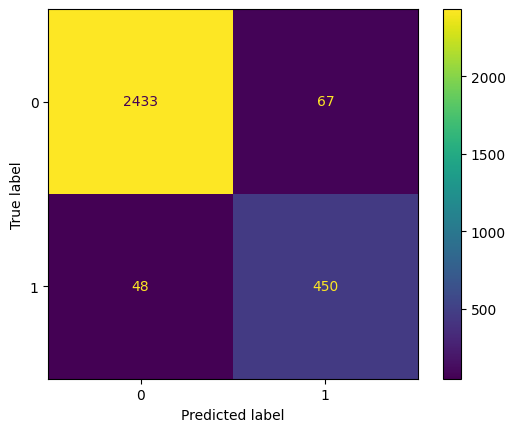

In [140]:
# Generate the confusion matrix from test set predictions
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot the confusion matrix for clear visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

Next, I will inspect the split points of the decision tree model and the most important features in the random forest model. This is an important step in **model interpretability**, as it helps to understand the "why" behind the model's predictions.

### **Decision Tree Visualization**
To interpret the ``DecisionTreeClassifier``, I plotted the final, optimized tree from the second round of modeling. This visualization reveals the series of rules the model uses to classify employees. By examining the splits at each node, I can see which features and thresholds are most influential in predicting whether an employee will leave or stay. The tree's structure provides a clear, step-by-step path to the model's prediction.

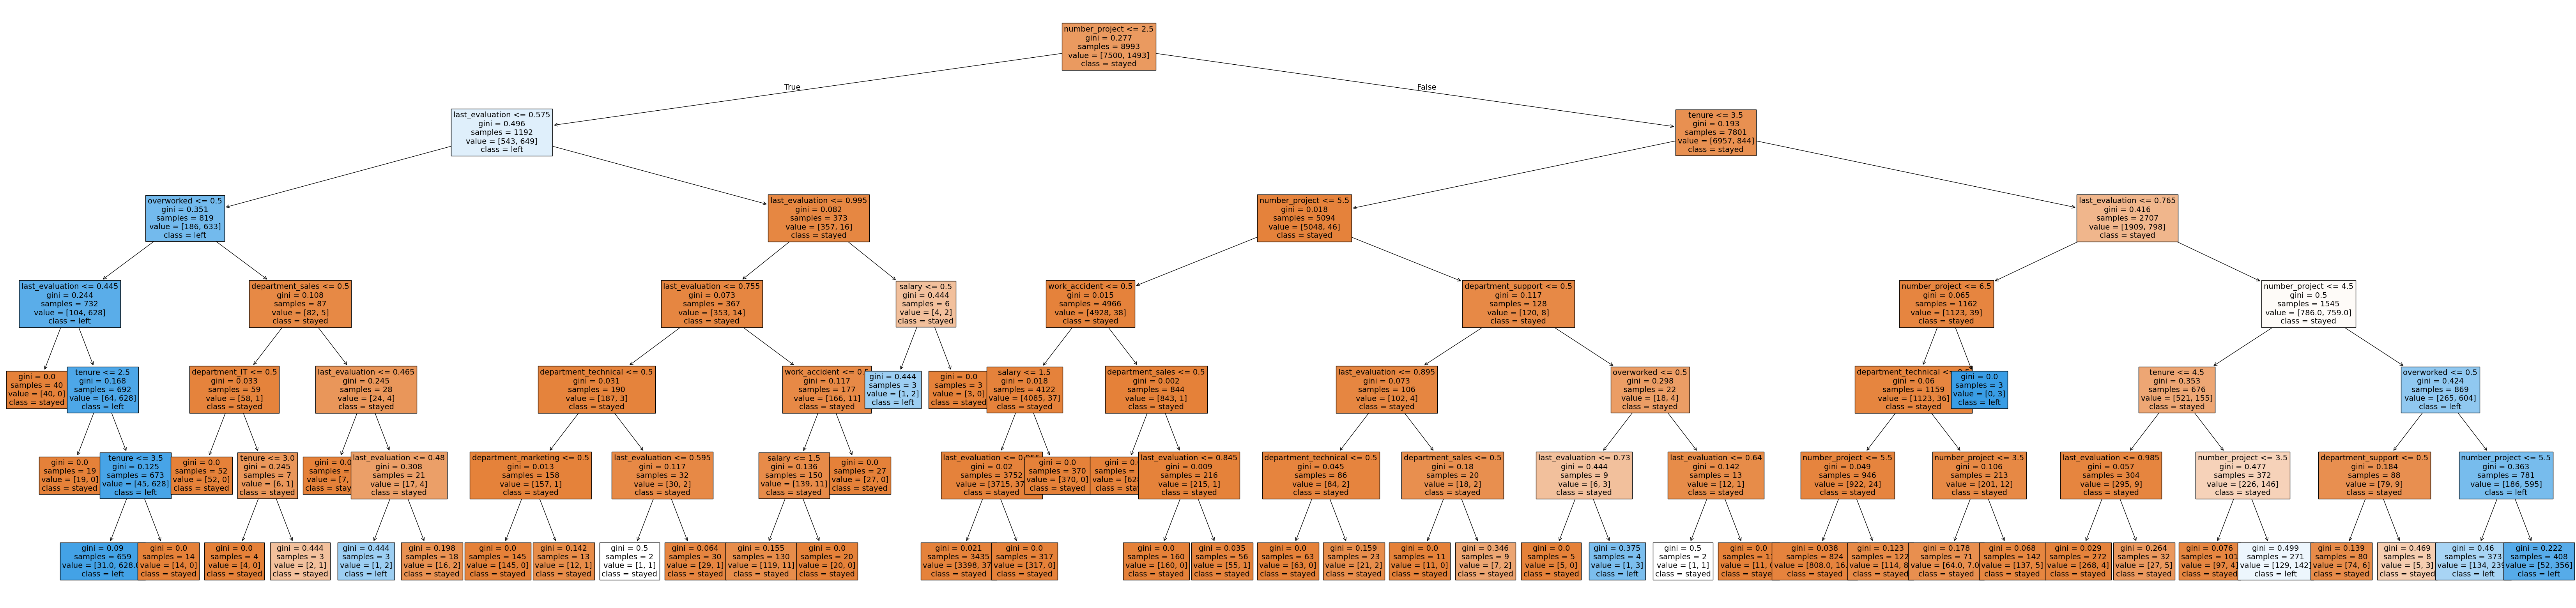

In [141]:
# Plot the decision tree with a maximum depth of 6 for clarity
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

The tree plot is a powerful tool for model interpretability, showing how simple rules derived from features like ``overworked`` and ``last_evaluation`` lead to complex classification decisions.

**Decision Tree Feature Importance**

To gain a deeper understanding of the **decision tree's** predictive logic, I analyzed the **feature** **importance** based on the **Gini impurity** metric. Gini importance measures how much each feature contributes to the reduction of impurity (or increase in node purity) across the tree's splits. Features with higher importance values are considered more influential in the model's predictions.

I extracted the importance scores for each feature and sorted them to identify the most critical variables. I also filtered out features with an importance of zero, focusing only on those that the model actually used for making decisions.

In [142]:
# Calculate and organize feature importances from the best decision tree model
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns)

# Sort the features by their importance in descending order
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Filter to show only features with an importance score greater than zero
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

This analysis confirmed which features were most critical to the model's ability to predict employee turnover. This step is essential for **model interpretability**, as it provides actionable insights beyond just a prediction score.

**Visualizing Feature Importance 📊**

To gain a clear understanding of which features were most influential in the **decision tree model's** predictions, I created a **barplot** of the feature importances. This visualization allows for a quick and intuitive comparison of each feature's contribution to the model's performance. The bars are sorted by their **Gini importance**, which measures how much each feature reduces impurity at the decision nodes.

**Random Forest Feature Importance**
To understand which features are most influential in the **random forest model's** predictions, I analyzed and visualized their **feature importance**. This metric measures the collective contribution of each feature to the model's predictive power, averaged across all the decision trees within the forest. Features with higher importance scores are considered more impactful in determining the final classification.

I extracted the feature importances from the trained model and plotted the top ten features to highlight the most significant variables. This visualization provides a clear and actionable summary of the key drivers behind the model's predictions.

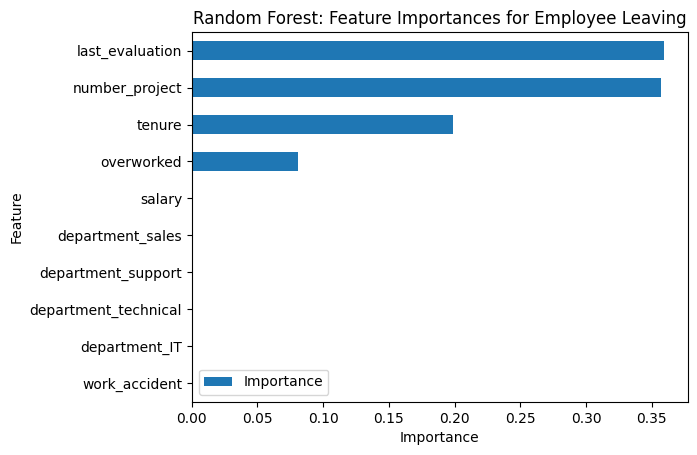

In [144]:
# Get feature importances from the best random forest model
feat_impt = rf2.best_estimator_.feature_importances_

# Get the indices and labels of the top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]
feat_impt = feat_impt[ind]

# Organize and sort the data for plotting
y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")

# Plot the feature importances as a bar chart
fig = plt.figure()
ax1 = fig.add_subplot(111)
y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

# Add a title and labels for clarity
ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The bar plot reveals that ``last_evaluation``, ``number_project``, ``tenure``, and ``overworked`` are the most important features. These findings are consistent with the decision tree model's results, which reinforces their significance. Identifying these key drivers provides critical insights for developing targeted business strategies to improve employee retention.

## **pacE: Execute Stage**
***
**Interpreting Model Performance and Results 📊**
In the final stage of this project, I evaluated the performance of the machine learning models and translated the key findings into actionable business recommendations. This phase is crucial for bridging the gap between data analysis and real-world impact.

**Evaluation Metrics Recap**
To accurately assess the models, I focused on several key metrics:

- **AUC**: The **Area Under the Receiver Operating Characteristic (ROC) curve**, which indicates the model's ability to distinguish between positive and negative classes.

- **Precision**: The proportion of positive predictions that were actually correct.

- **Recall**: The proportion of actual positive cases that were correctly identified.

- **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.

- **Accuracy**: The overall proportion of correct predictions.
***

**Project Summary and Insights**

My analysis included a **logistic regression** model and a suite of **tree-based models** (decision tree and random forest). After an initial round of modeling, I performed **feature engineering** to mitigate potential **data leakage** and improve model robustness.

**Model Performance**

- **Logistic Regression**: Achieved an accuracy of 83% on the test set, with balanced precision (80%) and recall (83%).

- **Tree-based Models**: The engineered models showed significant improvement. The **decision tree** achieved an impressive 96.2% accuracy on the test set, with a 93.8% AUC score. The **random forest** model, with its ensemble approach, slightly outperformed the decision tree.

The high scores from the engineered models confirmed that the new ``overworked`` feature was a reliable and effective predictor of employee turnover.
***
**Actionable Recommendations for Stakeholders**

Based on the model's insights and feature importance analysis, I propose the following recommendations to management to improve employee retention:

1. **Workload Management**: Our analysis suggests that employees are leaving because they are overworked. I recommend setting clear caps on the number of projects an employee can handle to prevent burnout.

2. **Compensation and Recognition**: Investigate compensation and overtime pay policies. Employees who work longer hours should be appropriately rewarded, and the expectations around workload and time off should be made explicit to all staff.

3. **Tenure-Based Interventions**: The models identified that employees with at least four years of tenure are at a higher risk of leaving. The company should investigate the reasons for this dissatisfaction and consider proactive retention strategies, such as promotions or career development opportunities, for this group.

4. **Culture and Communication**: Organize company-wide discussions to understand and address the work culture. This will help identify issues beyond just workload, such as a lack of recognition for hard work.

5. **Re-evaluate Performance Metrics**: High evaluation scores should not be exclusively tied to long working hours. I recommend implementing a proportionate scale that rewards effort and contribution in a more balanced way.
***

**Next Steps and Ethical Considerations**
To further refine the model, I would explore removing the ``last_evaluation`` feature. This would test the model's performance without a variable that might not be frequently updated, leading to a model that is more practical for real-time predictions.

Looking beyond the current project, I would consider building a K-means model to identify clusters of employees with similar characteristics. This could provide deeper insights into different groups at risk of leaving.

From an ethical standpoint, it is crucial to ensure that the model's predictions are used responsibly. The model should not be used to punish or unfairly target employees but rather to inform management about systemic issues. I would recommend transparency about how the model works and what features it uses, ensuring it is a tool for proactive problem-solving, not for disciplinary action.